In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import plotly.express as px

In [3]:
raceSum = pd.read_csv('../dataSets/f1-od/race_summaries.csv')

Numero di gran premi ospitati da ciascuno stato

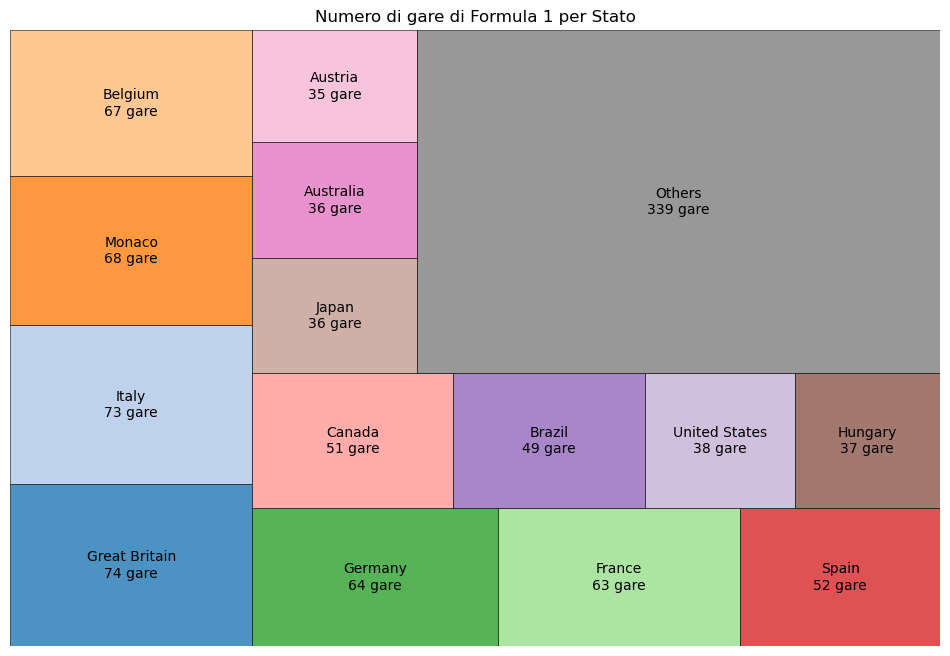

In [9]:
# Contiamo il numero di gare per ogni circuito
circuit_count = raceSum['Grand Prix'].value_counts()

# Selezioniamo i primi 15 circuiti
top_15_circuits = circuit_count.head(14)

# Raggruppiamo gli altri circuiti sotto la categoria "Altri"
others = circuit_count.iloc[14:].sum()
top_15_circuits['Others'] = others

# Prepariamo i dati per il grafico ad albero
labels = [f"{circuit}\n{count} gare" for circuit, count in zip(top_15_circuits.index, top_15_circuits.values)]
sizes = top_15_circuits.values

# Creazione del grafico ad albero con margini tra i quadrati
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=.8, color=plt.cm.tab20.colors, pad=False, edgecolor="black", linewidth=0.5)
plt.title('Numero di gare di Formula 1 per Stato')
plt.axis('off')  # Rimuove gli assi
plt.show()

Cartogramma con tutti gli Stati che hanno ospitato GP

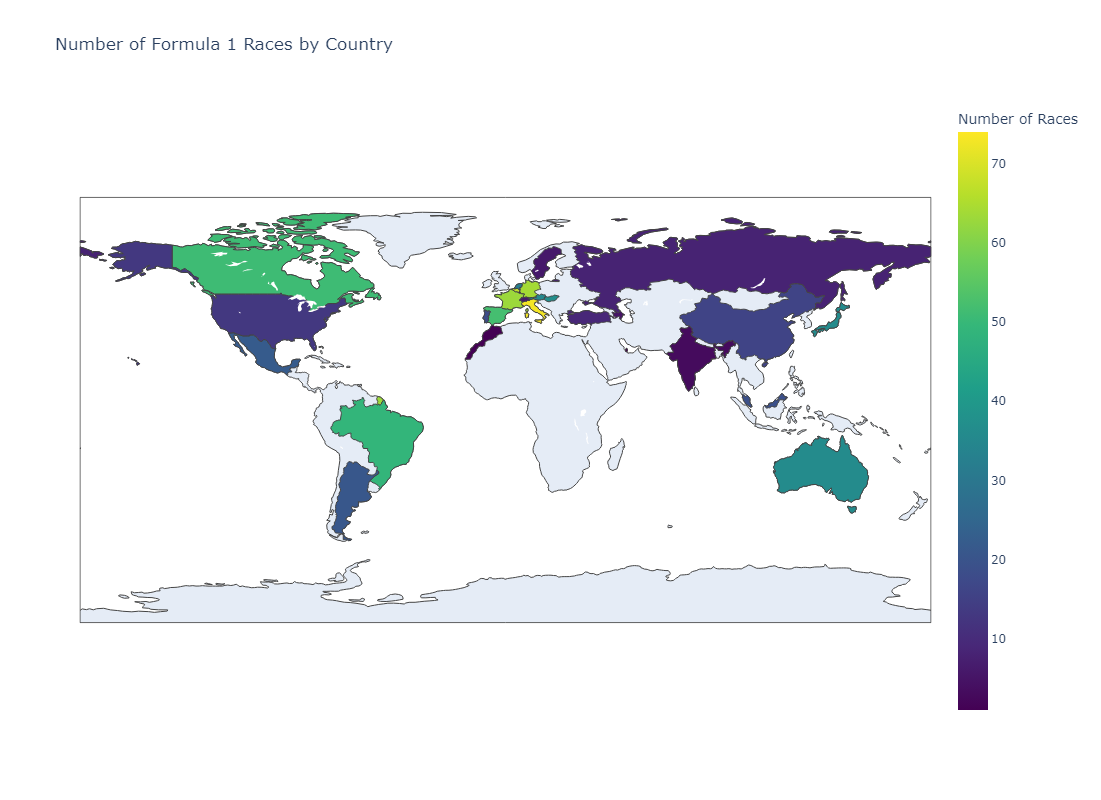

In [10]:
# Step 2: Elaborazione dei dati
# Estrai il nome dello stato dal campo "Grand Prix"
# Supponiamo che il nome dello stato sia la prima parola del campo "Grand Prix"
raceSum['Country'] = raceSum['Grand Prix'].apply(lambda x: x.split(' ')[0])

# Conta il numero di Gran Premi per ogni stato
gp_count = raceSum['Country'].value_counts().reset_index()
gp_count.columns = ['Country', 'Number of Races']

# Step 3: Creazione del cartogramma
fig = px.choropleth(gp_count,
                    locations='Country',
                    locationmode='country names', # Assumiamo che 'Country' contenga i nomi dei paesi validi
                    color='Number of Races',
                    color_continuous_scale='Viridis',
                    title='Number of Formula 1 Races by Country',
                    width=1100,
                    height=800)

# Mostra il grafico
fig.show()

Numero di gare per anno

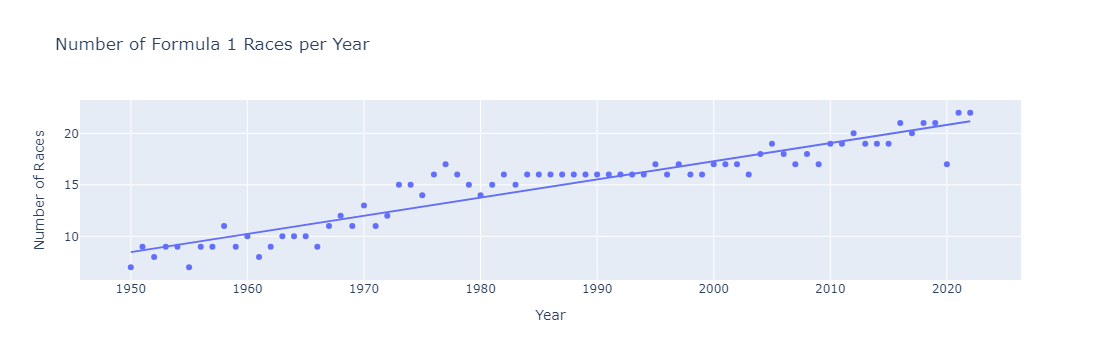

In [13]:
#Step 2: Elaborazione dei dati
#Conta il numero di Gran Premi per ogni anno
gp_per_year = raceSum.groupby('Year')['Grand Prix'].count().reset_index()
gp_per_year.columns = ['Year', 'Number of Races']

#Step 3: Creazione del grafico a dispersione con linea di andamento
fig = px.scatter(
    gp_per_year,
    x='Year',
    y='Number of Races',
    title='Number of Formula 1 Races per Year',
    labels={'Year': 'Year', 'Number of Races': 'Number of Races'},
    trendline='ols',  # Aggiunge una linea di tendenza usando il metodo dei minimi quadrati ordinari
)

#Mostra il grafico
fig.show()